<a href="https://colab.research.google.com/github/giriragav/Qiskit/blob/main/GV's_FinalWorkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Welcome to Session on Basic Quantum Gates (Session 5)

**By ISAQC**  
Co-coordinator,  
IIIT Society for Applied Quantum Computing

# Quantum Computing Fundamentals

### What is a Qubit?

A qubit (quantum bit) is the fundamental unit of quantum information. Unlike classical bits that can only be 0 or 1, qubits can exist in a **superposition** of both states simultaneously:

**|ψ⟩ = α|0⟩ + β|1⟩**

Where:
- α and β are complex numbers called **amplitudes**
- |α|² + |β|² = 1 (normalization condition)
- |α|² = probability of measuring |0⟩
- |β|² = probability of measuring |1⟩

### What is a Statevector?

A **statevector** is the complete mathematical description of a quantum system. It contains all the information about the quantum state:

**For 1 qubit**: |ψ⟩ = α|0⟩ + β|1⟩ → [α, β]
**For 2 qubits**: |ψ⟩ = α|00⟩ + β|01⟩ + γ|10⟩ + δ|11⟩ → [α, β, γ, δ]
**For n qubits**: 2ⁿ complex numbers

**Key Properties:**
- Contains probability amplitudes (not just probabilities)
- Includes phase information (crucial for quantum interference)
- Grows exponentially with number of qubits
- Cannot be directly measured (only probabilities can be observed)

In [ ]:
# qiskit
# qiskit-aer
# qiskit-ibm-runtime
# ipywidgets
# matplotlib
# numpy
# ipython
# pandas

# Enhanced imports for interactive visualizations and animations

# !pip install qiskit  # Uncomment if Qiskit is not installed
# !pip install qiskit-aer
# !pip install qiskit-ibm-runtime
# !pip install ipywidgets
# !pip install matplotlib
# !pip install numpy
# !pip install pylatexenc

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display, clear_output
import ipywidgets as widgets
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere, plot_histogram
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator,QiskitRuntimeService
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit import transpile

import qiskit
print(qiskit.__version__)
import time

# Configure matplotlib for better display
plt.rcParams['figure.figsize'] = [6, 6]
plt.rcParams['font.size'] = 8
%matplotlib inline



2.2.1


# Interactive Quantum State Visualizations

Before diving into quantum gates, let's build an intuitive understanding of quantum states through interactive visualizations and demonstrations.

## The Bloch Sphere

The Bloch sphere is a geometric representation of qubit states. Any single qubit state can be represented as a point on or inside a unit sphere:

### Key Points on the Bloch Sphere:
- **North Pole (0,0,1)**: |0⟩ state
- **South Pole (0,0,-1)**: |1⟩ state  
- **+X axis (1,0,0)**: |+⟩ = (|0⟩ + |1⟩)/√2 (superposition)
- **-X axis (-1,0,0)**: |-⟩ = (|0⟩ - |1⟩)/√2
- **+Y axis (0,1,0)**: |+i⟩ = (|0⟩ + i|1⟩)/√2
- **-Y axis (0,-1,0)**: |-i⟩ = (|0⟩ - i|1⟩)/√2

### Mathematical Representation:
Any qubit state can be written as:
**$|ψ⟩ = cos \frac{θ}{2}|0⟩ + e^{iφ}sin \frac{θ}{2}|1⟩$**

Where θ and φ are spherical coordinates:
- **θ**: Polar angle (0 to π)
- **φ**: Azimuthal angle (0 to 2π)

### What Quantum Gates Do to the Bloch Sphere:
- **Pauli-X**: 180° rotation around X-axis
- **Pauli-Y**: 180° rotation around Y-axis  
- **Pauli-Z**: 180° rotation around Z-axis
- **Hadamard**: 180° rotation around (X+Z)/√2 axis
- **Rotation Gates**: Arbitrary rotations around X, Y, or Z axes

### Limitations:
- Only works for single qubits (pure states)
- Multi-qubit entangled states cannot be represented on individual Bloch spheres
- Mixed states (with classical uncertainty) lie inside the sphere

In [ ]:
# Interactive Bloch Sphere Demo
def create_interactive_bloch_sphere():
	"""Create an interactive Bloch sphere that responds to slider inputs"""

	# Create the interactive widgets
	theta_slider = widgets.FloatSlider(
		value=0.0, min=0.0, max=np.pi, step=0.1,
		description='θ (Polar):', style={'description_width': 'initial'}
	)

	phi_slider = widgets.FloatSlider(
		value=0.0, min=0.0, max=2*np.pi, step=0.1,
		description='φ (Azimuthal):', style={'description_width': 'initial'}
	)

	output = widgets.Output()

	def update_bloch_sphere(theta, phi):
		"""Update the Bloch sphere visualization"""
		with output:
			clear_output(wait=True)

			# Create quantum state from spherical coordinates
			alpha = np.cos(theta/2)
			beta = np.exp(1j * phi) * np.sin(theta/2)

			# Create statevector
			state = Statevector([alpha, beta])

			# Bloch sphere
			plot_bloch_multivector(state, title="Bloch Sphere Representation")

			print("Quantum State Information")
			print(f"θ = {theta:.2f} radians ({theta*180/np.pi:.1f}°)")
			print(f"φ = {phi:.2f} radians ({phi*180/np.pi:.1f}°)")
			print(f"α (amplitude of |0⟩) = {alpha:.3f}")
			print(f"β (amplitude of |1⟩) = {beta:.3f}")
			print(f"|α|² (prob of |0⟩) = {abs(alpha)**2:.3f}")
			print(f"|β|² (prob of |1⟩) = {abs(beta)**2:.3f}")

			# Special states detection
			if abs(theta) < 0.1:
				print("Special State: |0⟩ (North Pole)")
			elif abs(theta - np.pi) < 0.1:
				print("Special State: |1⟩ (South Pole)")
			elif abs(theta - np.pi/2) < 0.1 and abs(phi) < 0.1:
				print("Special State: |+⟩ (+X axis)")
			elif abs(theta - np.pi/2) < 0.1 and abs(phi - np.pi) < 0.1:
				print("Special State: |-⟩ (-X axis)")
			elif abs(theta - np.pi/2) < 0.1 and abs(phi - np.pi/2) < 0.1:
				print("Special State: |+i⟩ (+Y axis)")
			elif abs(theta - np.pi/2) < 0.1 and abs(phi - 3*np.pi/2) < 0.1:
				print("Special State: |-i⟩ (-Y axis)")

			fig = plot_bloch_multivector(state)
			display(fig)

	# Create interactive widget
	interactive_plot = widgets.interactive(update_bloch_sphere, theta=theta_slider, phi=phi_slider)

	# Display
	display(widgets.VBox([
		widgets.HTML("<h3>Interactive Bloch Sphere Explorer</h3><p>Move the sliders to explore different quantum states!</p>"),
		interactive_plot,
		output
	]))

# Run the interactive demo
create_interactive_bloch_sphere()

$|ψ⟩ = cos \frac{θ}{2}|0⟩ + e^{iφ}sin \frac{θ}{2}|1⟩$  
$|ψ_1⟩ = \frac{1}{\sqrt{2}}|0⟩ + \frac{1}{\sqrt{2}}|1⟩$

In [ ]:
# @title
# Interactive Quantum State Creator
def create_quantum_state_builder():
    """Build custom quantum states interactively"""

    # Widgets for state creation
    alpha_real = widgets.FloatSlider(value=1.0, min=-2.0, max=2.0, step=0.1, description='α (real):')
    alpha_imag = widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='α (imag):')
    beta_real = widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='β (real):')
    beta_imag = widgets.FloatSlider(value=0.0, min=-2.0, max=2.0, step=0.1, description='β (imag):')

    normalize_check = widgets.Checkbox(value=True, description='Auto-normalize')

    output = widgets.Output()

    def update_state(alpha_r, alpha_i, beta_r, beta_i, normalize):
        with output:
            clear_output(wait=True)

            # Create complex amplitudes
            alpha = alpha_r + 1j * alpha_i
            beta = beta_r + 1j * beta_i

            # Normalize if requested
            if normalize:
                norm = np.sqrt(abs(alpha)**2 + abs(beta)**2)
                if norm > 0:
                    alpha /= norm
                    beta /= norm

            try:
                # Create state
                state = Statevector([alpha, beta])
                plot_bloch_multivector(state, title="Your Custom Quantum State")
                print("🎯 Custom State Properties")
                print(f"α = {alpha:.3f}")
                print(f"β = {beta:.3f}")
                print(f"|α|² = {abs(alpha)**2:.3f}")
                print(f"|β|² = {abs(beta)**2:.3f}")
                print(f"Normalization: {abs(alpha)**2 + abs(beta)**2:.3f}")

                if abs(abs(alpha)**2 + abs(beta)**2 - 1.0) > 0.01:
                    print("⚠️ State not normalized!")
                else:
                    print("✅ State properly normalized")

                fig = plot_bloch_multivector(state)
                display(fig)

            except Exception as e:
                print(f"Error creating state: {e}")

    # Create interactive widget
    interactive_builder = widgets.interactive(
        update_state,
        alpha_r=alpha_real, alpha_i=alpha_imag,
        beta_r=beta_real, beta_i=beta_imag,
        normalize=normalize_check
    )

    # Display
    display(widgets.VBox([
        widgets.HTML("<h3>🏗️ Quantum State Builder</h3><p>Create your own quantum states by adjusting the amplitudes!</p>"),
        interactive_builder,
        output
    ]))

create_quantum_state_builder()

## Quantum Superposition

Superposition allows qubits to be in multiple states simultaneously:
- **Classical**: A bit is either 0 OR 1
- **Quantum**: A qubit can be 0 AND 1 at the same time

**Example**: After applying a Hadamard gate to |0⟩:
|ψ⟩ = (|0⟩ + |1⟩)/√2

This means 50% probability of measuring 0 and 50% probability of measuring 1.

/tmp/ipython-input-3607111769.py:38: UserWarning: Glyph 128421 (\N{DESKTOP COMPUTER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


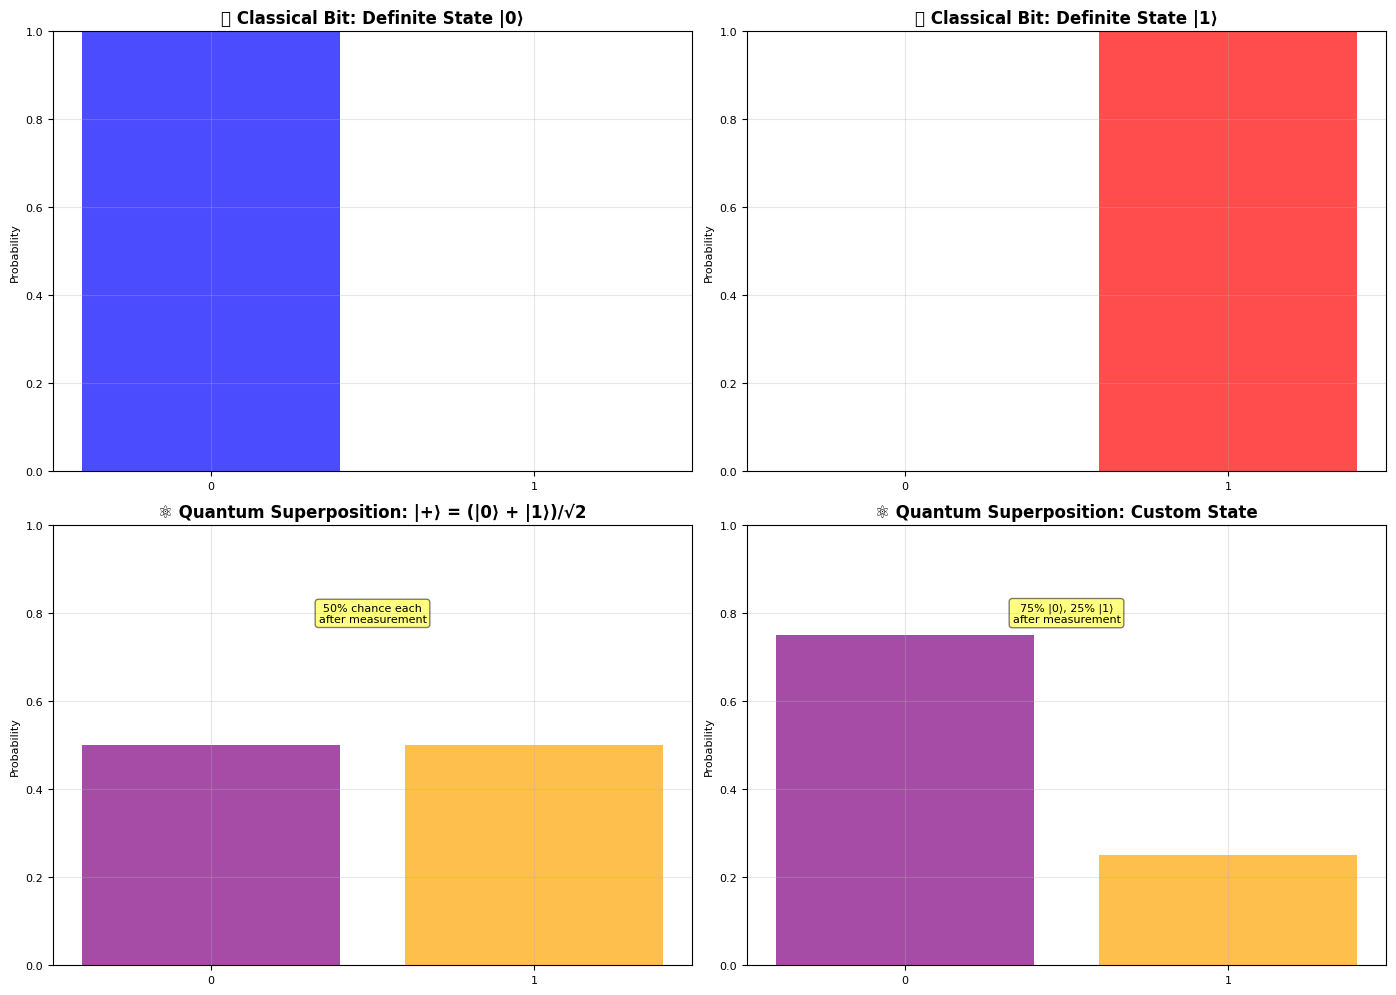

🔍 Key Insights:
• Classical bits are always in definite states (0 OR 1)
• Quantum bits can be in superposition (0 AND 1 simultaneously)
• Superposition collapses to definite state upon measurement
• The probabilities determine measurement outcomes


In [ ]:
# Superposition Visualization Demo
def demonstrate_superposition():
    """Show the difference between classical and quantum superposition"""

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

    # Classical bit visualization
    ax1.bar(['0', '1'], [1, 0], color=['blue', 'red'], alpha=0.7)
    ax1.set_title("🖥️ Classical Bit: Definite State |0⟩", fontsize=12, fontweight='bold')
    ax1.set_ylabel("Probability")
    ax1.set_ylim(0, 1)
    ax1.grid(True, alpha=0.3)

    ax2.bar(['0', '1'], [0, 1], color=['blue', 'red'], alpha=0.7)
    ax2.set_title("🖥️ Classical Bit: Definite State |1⟩", fontsize=12, fontweight='bold')
    ax2.set_ylabel("Probability")
    ax2.set_ylim(0, 1)
    ax2.grid(True, alpha=0.3)

    # Quantum superposition visualization
    ax3.bar(['0', '1'], [0.5, 0.5], color=['purple', 'orange'], alpha=0.7)
    ax3.set_title("⚛️ Quantum Superposition: |+⟩ = (|0⟩ + |1⟩)/√2", fontsize=12, fontweight='bold')
    ax3.set_ylabel("Probability")
    ax3.set_ylim(0, 1)
    ax3.grid(True, alpha=0.3)
    ax3.text(0.5, 0.8, "50% chance each\nafter measurement", ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))

    # Different superposition
    ax4.bar(['0', '1'], [0.75, 0.25], color=['purple', 'orange'], alpha=0.7)
    ax4.set_title("⚛️ Quantum Superposition: Custom State", fontsize=12, fontweight='bold')
    ax4.set_ylabel("Probability")
    ax4.set_ylim(0, 1)
    ax4.grid(True, alpha=0.3)
    ax4.text(0.5, 0.8, "75% |0⟩, 25% |1⟩\nafter measurement", ha='center', va='center',
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))

    plt.tight_layout()
    plt.show()

    print("🔍 Key Insights:")
    print("• Classical bits are always in definite states (0 OR 1)")
    print("• Quantum bits can be in superposition (0 AND 1 simultaneously)")
    print("• Superposition collapses to definite state upon measurement")
    print("• The probabilities determine measurement outcomes")

demonstrate_superposition()

## Quantum Entanglement

Entanglement is a quantum phenomenon where qubits become correlated - measuring one instantly affects the others, regardless of distance.

**Bell State Example**: |ψ⟩ = (|00⟩ + |11⟩)/√2
- If you measure the first qubit as 0, the second is guaranteed to be 0
- If you measure the first qubit as 1, the second is guaranteed to be 1

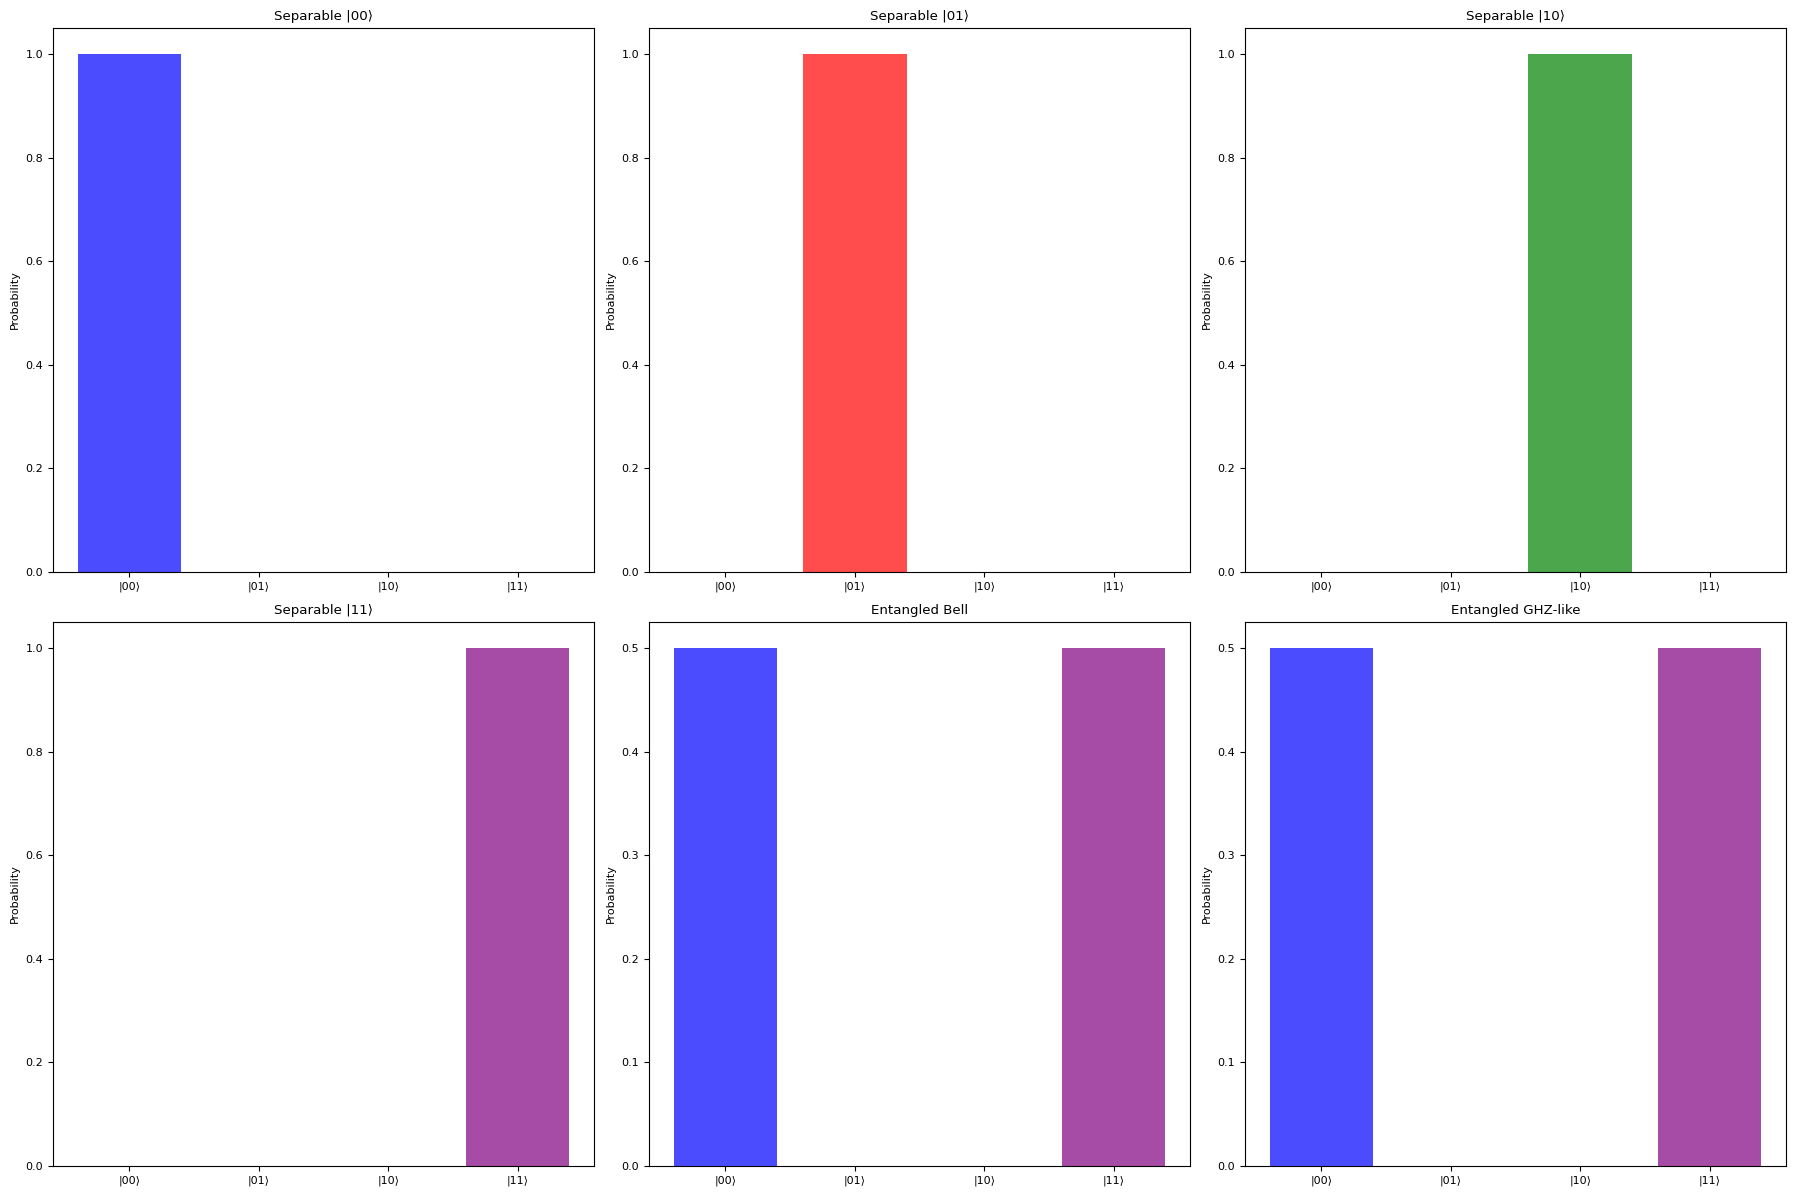

🔍 Entanglement Analysis:
Bell State |ψ⟩ = (|00⟩ + |11⟩)/√2:
  Measurement correlations: Perfect!
  If qubit 1 = |0⟩, then qubit 2 = |0⟩ (100%)
  If qubit 1 = |1⟩, then qubit 2 = |1⟩ (100%)

Separable State |00⟩:
  No correlations - qubits are independent
  Qubit 1 always |0⟩, Qubit 2 always |0⟩


In [ ]:
# Entanglement Visualization
def visualize_entanglement():
    """Create comprehensive entanglement visualizations"""

    # Create different two-qubit states
    states = {
        "Separable |00⟩": Statevector([1, 0, 0, 0]),
        "Separable |01⟩": Statevector([0, 1, 0, 0]),
        "Separable |10⟩": Statevector([0, 0, 1, 0]),
        "Separable |11⟩": Statevector([0, 0, 0, 1]),
        "Entangled Bell": Statevector([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]),
        "Entangled GHZ-like": Statevector([1/np.sqrt(2), 0, 0, -1/np.sqrt(2)])
    }

    # Create Q-sphere visualizations
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    for i, (name, state) in enumerate(states.items()):
        try:
            # Create Q-sphere plot
            plot_state_qsphere(state, ax=axes[i], title=name)
        except:
            # Fallback to histogram if Q-sphere fails
            probs = state.probabilities()
            labels = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']
            axes[i].bar(labels, probs, color=['blue', 'red', 'green', 'purple'], alpha=0.7)
            axes[i].set_title(name)
            axes[i].set_ylabel("Probability")

    plt.tight_layout()
    plt.show()

    # Show correlation analysis
    print("🔍 Entanglement Analysis:")
    print("="*50)

    bell_state = Statevector([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)])
    separable_state = Statevector([1, 0, 0, 0])

    print(f"Bell State |ψ⟩ = (|00⟩ + |11⟩)/√2:")
    print(f"  Measurement correlations: Perfect!")
    print(f"  If qubit 1 = |0⟩, then qubit 2 = |0⟩ (100%)")
    print(f"  If qubit 1 = |1⟩, then qubit 2 = |1⟩ (100%)")
    print()
    print(f"Separable State |00⟩:")
    print(f"  No correlations - qubits are independent")
    print(f"  Qubit 1 always |0⟩, Qubit 2 always |0⟩")

visualize_entanglement()

We are using the aer_simulator quantum computer


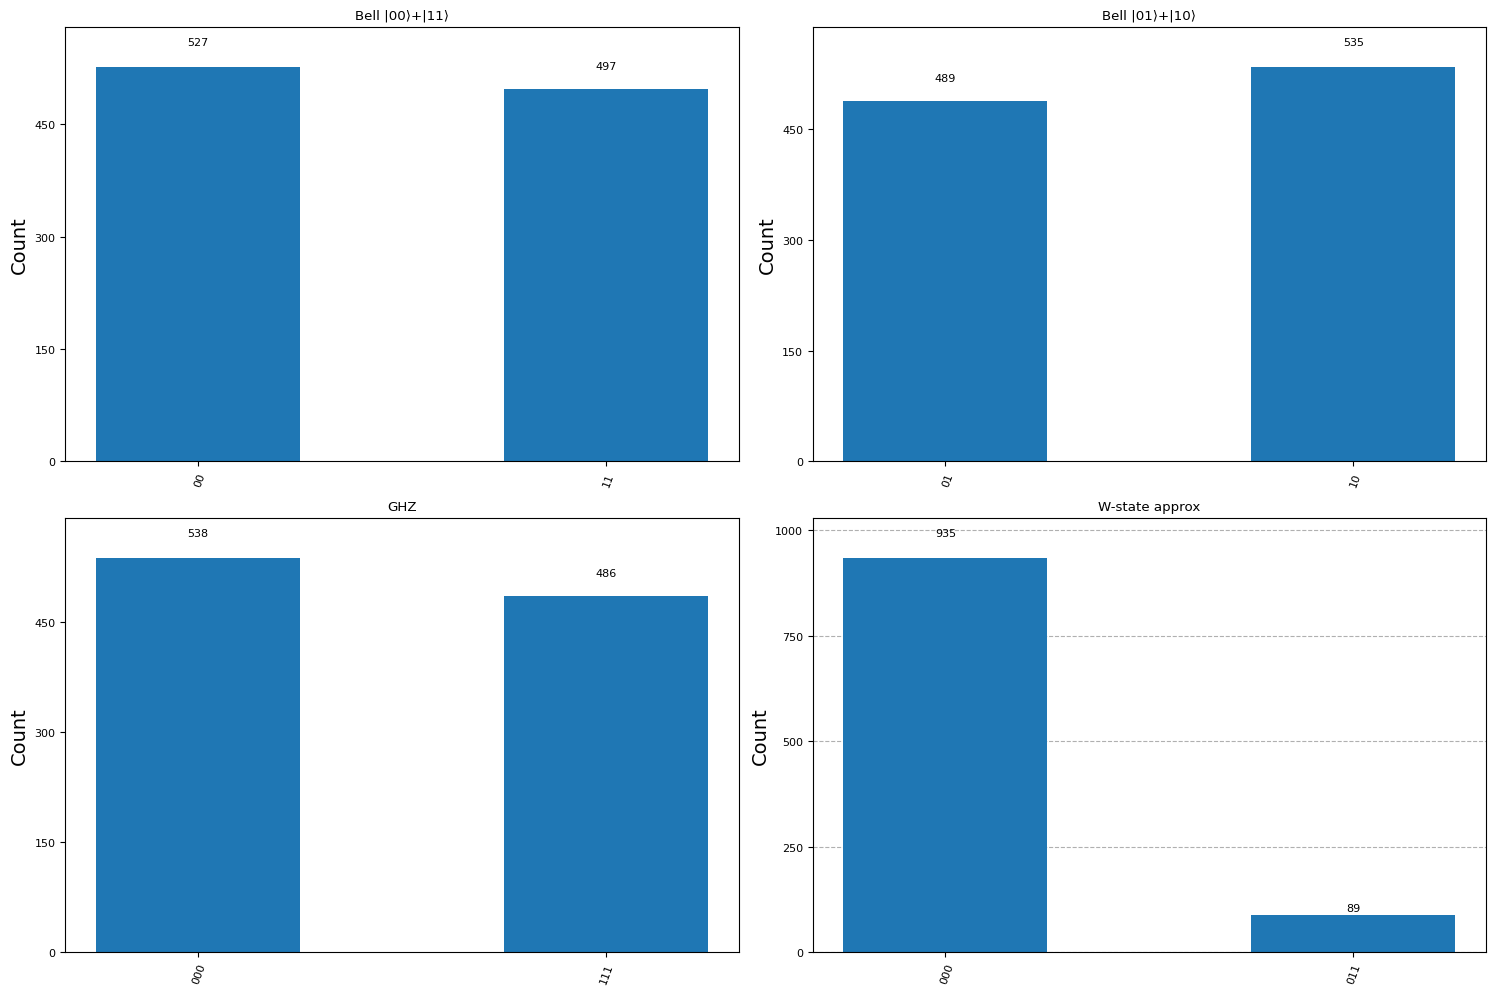

In [ ]:

def entanglement_showcase():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))

    # Bell State |00⟩ + |11⟩
    qc_bell = QuantumCircuit(2)
    qc_bell.h(0)
    qc_bell.cx(0, 1)
    qc_bell.measure_all()

    # Bell State |01⟩ + |10⟩
    qc_bell2 = QuantumCircuit(2)
    qc_bell2.h(0)
    qc_bell2.x(1)
    qc_bell2.cx(0, 1)
    qc_bell2.measure_all()

    # GHZ State
    qc_ghz = QuantumCircuit(3)
    qc_ghz.h(0)
    qc_ghz.cx(0, 1)
    qc_ghz.cx(0, 2)
    qc_ghz.measure_all()

    # W State (approx)
    qc_w = QuantumCircuit(3)
    qc_w.ry(np.arccos(np.sqrt(2/3)), 0)
    qc_w.cx(0, 1)
    qc_w.x(0)
    qc_w.ccx(0, 1, 2)
    qc_w.x(0)
    qc_w.measure_all()

    circuits = [qc_bell, qc_bell2, qc_ghz, qc_w]
    titles   = ["Bell |00⟩+|11⟩", "Bell |01⟩+|10⟩", "GHZ", "W-state approx"]

    # service = QiskitRuntimeService(name="qiskit_adi") - You can replace this with your own IBM Quantum account

    backend = AerSimulator()
    # backend = service.least_busy(operational=True, simulator=False)
    print(f"We are using the {backend.name} quantum computer")

    sampler = Sampler(mode=backend)

    pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

    for idx, qc in enumerate(circuits):
        transpiled_qc = transpile(qc, backend=backend)
        job = sampler.run(pm.run([transpiled_qc]), shots=1024)
        results = job.result()[0].data
        counts = results.meas.get_counts()
        plot_histogram(counts, ax=axes[idx//2, idx%2])
        axes[idx//2, idx%2].set_title(titles[idx])

    plt.tight_layout()
    plt.show()

entanglement_showcase()


## Understanding Measurement

### The Measurement Problem:

Quantum measurement is fundamentally different from classical measurement:

1. **Before Measurement**: Qubit exists in superposition
2. **During Measurement**: Superposition collapses to definite state
3. **After Measurement**: Only classical information remains

### Statistical Nature:

- Quantum measurements give probabilistic results
- Need many repetitions (shots) to estimate probabilities
- Results show frequency distribution, not individual outcomes

### Example:
If |+⟩ = (|0⟩ + |1⟩)/√2, measuring 1000 times might give:
- |0⟩: ~500 times (50%)
- |1⟩: ~500 times (50%)

The exact numbers vary due to quantum randomness and hardware noise.

🎯 Quantum Measurement Simulation
Initial state: |+⟩ = (|0⟩ + |1⟩)/√2
Theoretical probabilities: 50% |0⟩, 50% |1⟩



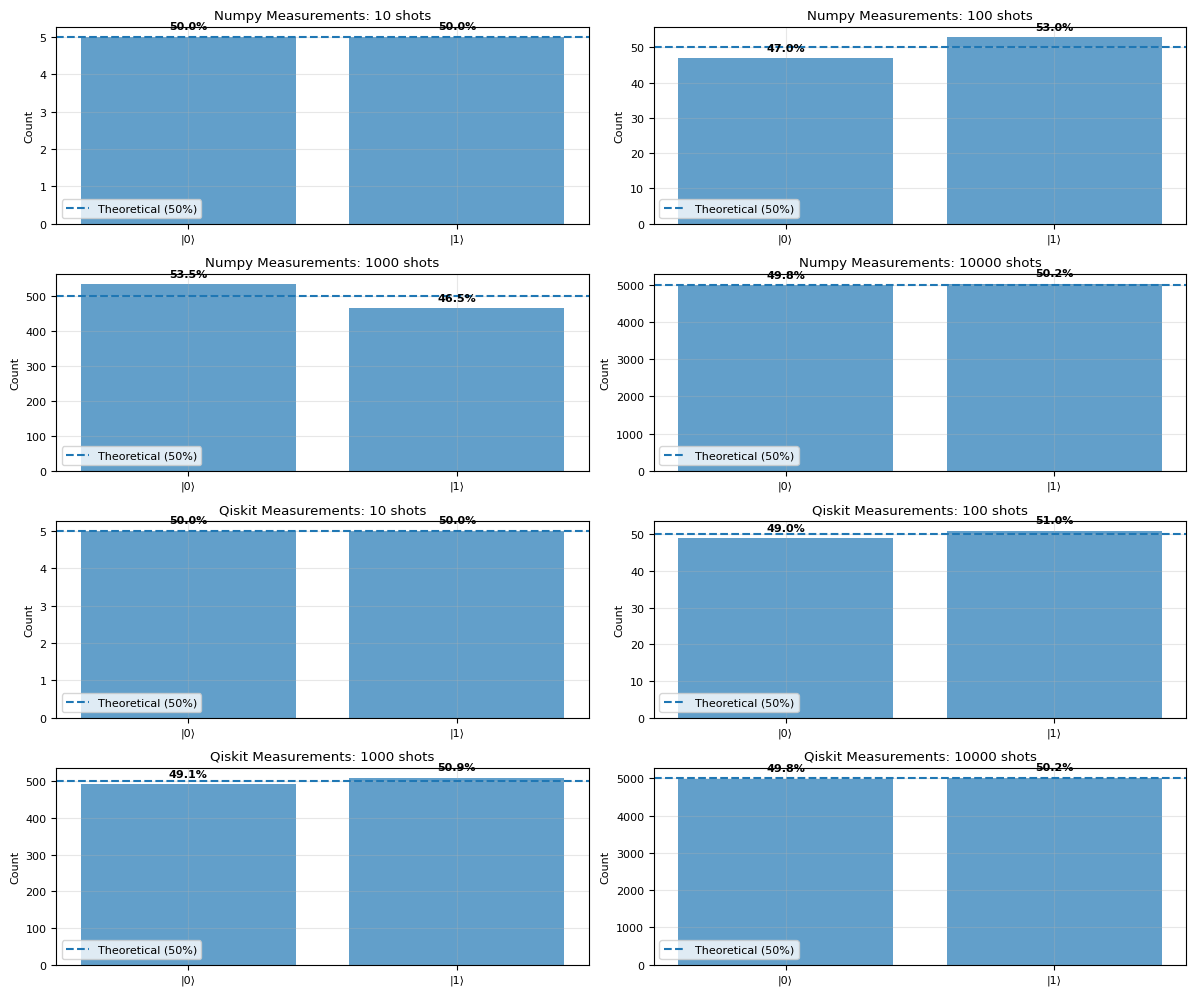

📊 Key Observations:
• With few measurements, results can deviate significantly from theory
• With many measurements, results converge to theoretical predictions
• This is the statistical nature of quantum mechanics!
• Real quantum computers show similar behavior plus hardware noise


In [ ]:
# Measurement Simulation
def simulate_quantum_measurement():
    """Simulate the quantum measurement process step by step"""

    # Create a superposition state
    qc = QuantumCircuit(1)
    qc.h(0)  # Create |+⟩ = (|0⟩ + |1⟩)/√2
    state = Statevector.from_instruction(qc)
    qc.measure_all()

    print("🎯 Quantum Measurement Simulation")
    print("="*50)
    print("Initial state: |+⟩ = (|0⟩ + |1⟩)/√2")
    print("Theoretical probabilities: 50% |0⟩, 50% |1⟩")
    print()

    # Simulate multiple measurement runs
    shot_counts = [10, 100, 1000, 10000]

    fig, axes = plt.subplots(4, 2, figsize=(12, 10))
    axes = axes.flatten()

    # Setup backend & sampler (keeps your sampler-based workflow)
    # service = QiskitRuntimeService(name="qiskit_adi") - You can replace this with your own IBM Quantum account
    backend = AerSimulator()
    simulator_sampler = Sampler(mode=backend)
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

    for i, shots in enumerate(shot_counts):
        # Numpy pseudo-measurements (ideal iid sampling)
        measurements = np.random.choice([0, 1], size=shots, p=[0.5, 0.5])

        # Qiskit measurement simulation using your sampler + pass manager flow
        transpiled_qc = transpile(qc, backend=backend)
        job = simulator_sampler.run(pm.run([transpiled_qc]), shots=shots)
        qiskit_result_block = job.result()[0].data
        actual_measurements = qiskit_result_block.meas.get_counts()

        # Count results (numpy)
        count_0 = int(np.sum(measurements == 0))
        count_1 = int(np.sum(measurements == 1))
        # Count results (qiskit) — ensure correct mapping of keys
        actual_count_0 = int(actual_measurements.get('0', 0))
        actual_count_1 = int(actual_measurements.get('1', 0))

        # Plot numpy results (left column)
        axes[i].bar(['|0⟩', '|1⟩'], [count_0, count_1], alpha=0.7)
        axes[i].set_title(f"Numpy Measurements: {shots} shots")
        axes[i].set_ylabel("Count")
        # Plot qiskit results (right column)
        axes[i + 4].bar(['|0⟩', '|1⟩'], [actual_count_0, actual_count_1], alpha=0.7)
        axes[i + 4].set_title(f"Qiskit Measurements: {shots} shots")
        axes[i + 4].set_ylabel("Count")

        # Add percentage labels
        axes[i].text(0, count_0 + shots*0.02, f"{count_0/shots*100:.1f}%", ha='center', fontweight='bold')
        axes[i].text(1, count_1 + shots*0.02, f"{count_1/shots*100:.1f}%", ha='center', fontweight='bold')
        axes[i + 4].text(0, actual_count_0 + shots*0.02, f"{actual_count_0/shots*100:.1f}%", ha='center', fontweight='bold')
        axes[i + 4].text(1, actual_count_1 + shots*0.02, f"{actual_count_1/shots*100:.1f}%", ha='center', fontweight='bold')

        # Add theoretical line
        axes[i].axhline(y=shots/2, linestyle='--', label='Theoretical (50%)')
        axes[i + 4].axhline(y=shots/2, linestyle='--', label='Theoretical (50%)')
        axes[i].legend()
        axes[i + 4].legend()
        axes[i].grid(True, alpha=0.3)
        axes[i + 4].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print("📊 Key Observations:")
    print("• With few measurements, results can deviate significantly from theory")
    print("• With many measurements, results converge to theoretical predictions")
    print("• This is the statistical nature of quantum mechanics!")
    print("• Real quantum computers show similar behavior plus hardware noise")

simulate_quantum_measurement()

# Basic Quantum States

Quantum states represent the complete mathematical description of a quantum system. Here are the most important basic quantum states:

## Computational Basis States
- **|0⟩**: Ground state (North pole on Bloch sphere)
- **|1⟩**: Excited state (South pole on Bloch sphere)

## Superposition States
- **|+⟩ = (|0⟩ + |1⟩)/√2**: Equal superposition (+X axis on Bloch sphere)
- **|-⟩ = (|0⟩ - |1⟩)/√2**: Equal superposition with phase (-X axis on Bloch sphere)
- **|+i⟩ = (|0⟩ + i|1⟩)/√2**: Complex superposition (+Y axis on Bloch sphere)
- **|-i⟩ = (|0⟩ - i|1⟩)/√2**: Complex superposition (-Y axis on Bloch sphere)

## Entangled States (Multi-qubit)
- **Bell State |Φ+⟩ = (|00⟩ + |11⟩)/√2**: Most common entangled state
- **GHZ State = (|000⟩ + |111⟩)/√2**: Three-qubit entanglement
- **W State = (|001⟩ + |010⟩ + |100⟩)/√3**: Alternative three-qubit entangled state

The power of quantum computing comes from manipulating these states with quantum gates and harnessing quantum effects like superposition and entanglement.

🎓 Learning Points:
• Computational basis states |0⟩ and |1⟩ have definite measurement outcomes
• Superposition states have probabilistic outcomes
• Complex phases (i, -i) don't affect measurement probabilities
• But phases DO affect quantum interference and gate operations!


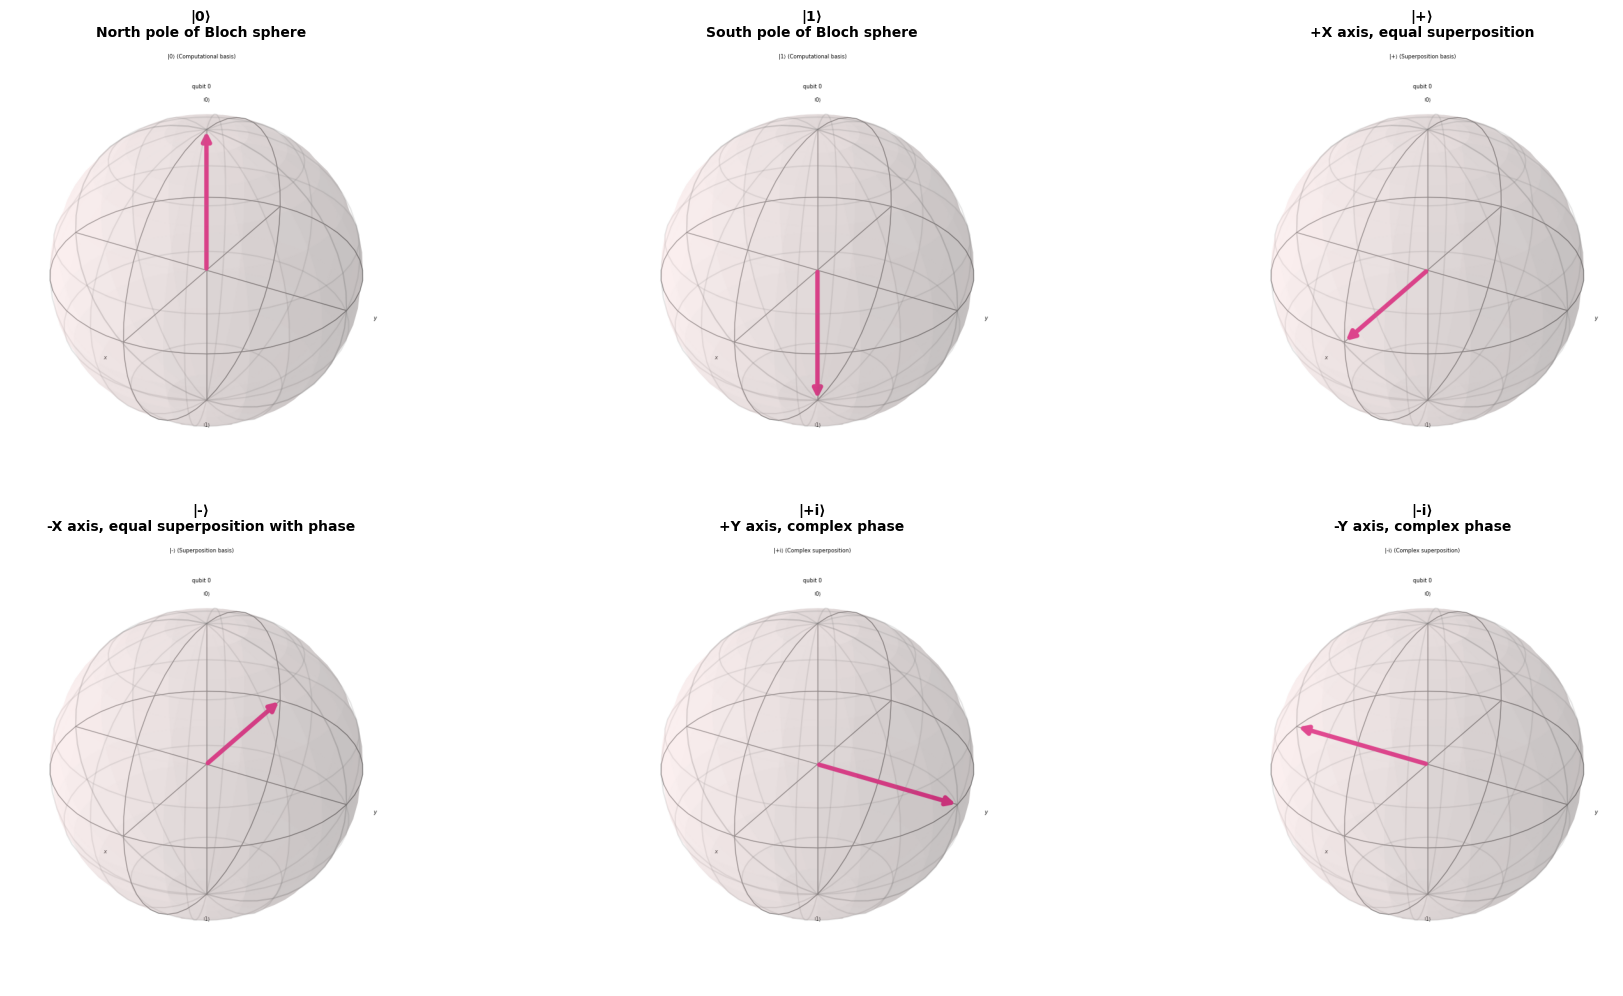

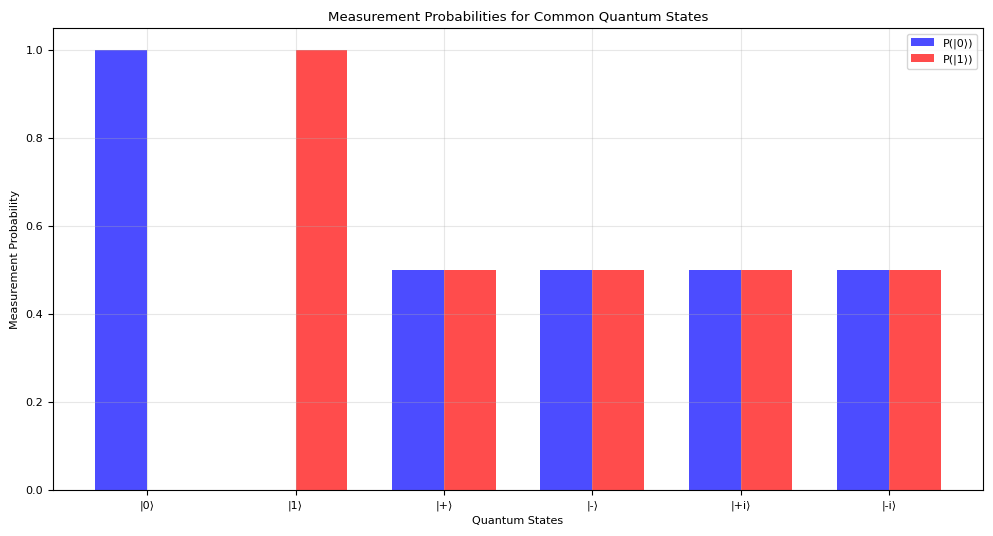

In [ ]:
# Common Quantum States Gallery
def quantum_states_gallery():
	"""Display gallery of important quantum states"""

	states_info = [
		("|0⟩", "Computational basis", [1, 0], "North pole of Bloch sphere"),
		("|1⟩", "Computational basis", [0, 1], "South pole of Bloch sphere"),
		("|+⟩", "Superposition basis", [1/np.sqrt(2), 1/np.sqrt(2)], "+X axis, equal superposition"),
		("|-⟩", "Superposition basis", [1/np.sqrt(2), -1/np.sqrt(2)], "-X axis, equal superposition with phase"),
		("|+i⟩", "Complex superposition", [1/np.sqrt(2), 1j/np.sqrt(2)], "+Y axis, complex phase"),
		("|-i⟩", "Complex superposition", [1/np.sqrt(2), -1j/np.sqrt(2)], "-Y axis, complex phase")
	]

	fig, axes = plt.subplots(2, 3, figsize=(20, 10))  # 4 rows, 2 columns

	for i, (name, category, amplitudes, description) in enumerate(states_info):
		state = Statevector(amplitudes)
		temp_fig = plot_bloch_multivector(state, title=f"{name} ({category})", font_size=6)

		# Convert the separate figure into an image and display it inside the subplot
		temp_fig.canvas.draw()
		img = temp_fig.canvas.renderer.buffer_rgba()

		axes.flat[i].imshow(img)
		axes.flat[i].axis("off")
		axes.flat[i].set_title(f"{name}\n{description}", fontsize=10, fontweight='bold')
		temp_fig.clf()

	plt.tight_layout()


	# Create probability comparison
	fig, ax = plt.subplots(1, 1, figsize=(12, 6))

	state_names = [info[0] for info in states_info]
	prob_0 = [abs(info[2][0])**2 for info in states_info]
	prob_1 = [abs(info[2][1])**2 for info in states_info]

	x = np.arange(len(state_names))
	width = 0.35

	ax.bar(x - width/2, prob_0, width, label='P(|0⟩)', color='blue', alpha=0.7)
	ax.bar(x + width/2, prob_1, width, label='P(|1⟩)', color='red', alpha=0.7)

	ax.set_xlabel('Quantum States')
	ax.set_ylabel('Measurement Probability')
	ax.set_title('Measurement Probabilities for Common Quantum States')
	ax.set_xticks(x)
	ax.set_xticklabels(state_names)
	ax.legend()
	ax.grid(True, alpha=0.3)

	print("🎓 Learning Points:")
	print("• Computational basis states |0⟩ and |1⟩ have definite measurement outcomes")
	print("• Superposition states have probabilistic outcomes")
	print("• Complex phases (i, -i) don't affect measurement probabilities")
	print("• But phases DO affect quantum interference and gate operations!")

quantum_states_gallery()

---

# Now Let's Explore Quantum Gates!

## What are Quantum Gates?

Quantum gates are the fundamental building blocks of quantum circuits. They are unitary operations that manipulate quantum states. Unlike classical logic gates, quantum gates are:

- **Reversible**: Every quantum gate has an inverse
- **Unitary**: They preserve the normalization of quantum states
- **Linear**: They operate on superposition states


With this foundation of quantum state visualization and understanding, we're ready to see how quantum gates manipulate these states. Each gate demonstration will show:

1. **Circuit diagram** - The quantum circuit representation
2. **Bloch sphere transformation** - How the state moves on the Bloch sphere  
3. **Measurement results** - Real data from IonQ quantum simulator
4. **Mathematical insight** - What the gate actually does

Remember:
- Gates are **rotations** on the Bloch sphere
- **Superposition** enables quantum parallelism
- **Entanglement** creates quantum correlations
- **Measurement** collapses quantum states to classical outcomes

Let's begin our journey through the quantum gate library! 🌟

In [ ]:

def create_and_visualize_gate(gate_name, circuit_func, shots=100, run=False):
	"""Helper function to visualize Bloch sphere before and after applying a gate side by side"""
	print(f"\n{'='*50}")
	print(f"QUANTUM GATE: {gate_name}")
	print(f"{'='*50}")

	# Create the quantum circuit
	qc = circuit_func()

	print("\nCircuit Diagram:")
	print(qc.draw(output='text'))

	try:
		_, ax = plt.subplots(1, 1, figsize=(4, 2))
		qc.draw(output='mpl', ax=ax)
		plt.title(f"{gate_name} - Circuit Diagram")
		plt.tight_layout()
		plt.show()
	except Exception as e:
		print(f"Circuit diagram error: {e}")

	if qc.num_qubits <= 3:
		try:
			initial_state = Statevector.from_instruction(QuantumCircuit(qc.num_qubits))  # |0⟩ state

			qc_statevector = qc.copy()
			# try to remove final measurements if present (best-effort)
			try:
				qc_statevector.remove_final_measurements()
			except Exception:
				# fallback: attempt to remove classical regs or last instructions if needed
				# if this fails, Statevector.from_instruction may still work if measurements weren't added
				pass

			final_state = Statevector.from_instruction(qc_statevector)

			# Plot initial state
			print("\n🔹 INITIAL STATE:")
			plot_bloch_multivector(initial_state, title="Initial State |0⟩", figsize=(4, 4))
			plt.show()
			fig = plot_bloch_multivector(initial_state)
			display(fig)

			# Plot final state
			print(f"\n🔹 AFTER {gate_name.upper()}:")
			plot_bloch_multivector(final_state, title=f"After {gate_name}", figsize=(4, 4))
			plt.show()

			fig = plot_bloch_multivector(final_state)
			display(fig)

		except Exception as e:
			print(f"Bloch sphere visualization error: {e}")

	if run:
		try:
			# Keep your sampler-based workflow
			#service = QiskitRuntimeService(name="qiskit_adi")
			backend = AerSimulator()
			simulator_sampler = Sampler(mode=backend)
			pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

			# Transpile then run through the preset pass manager using sampler.run(...)
			transpiled_qc = transpile(qc, backend=backend)
			job = simulator_sampler.run(pm.run([transpiled_qc]), shots=shots)
			job_result_block = job.result()[0].data

			counts = job_result_block.c.get_counts()

			# Print and show results
			print(f"\nMeasurement Results ({shots} shots):")
			if len(counts) == 0:
				print("No measurement results returned.")
			else:
				for state, count in counts.items():
					probability = count / shots
					print(f"  |{state}⟩: {count} times ({probability:.3f})")

				# Plot histogram with proper error handling
				try:
					fig, ax = plt.subplots(1, 1, figsize=(6, 4))
					plot_histogram(counts, title=f"{gate_name} - Measurement Results", ax=ax)
					plt.tight_layout()
					plt.show()
				except Exception as e:
					print(f"Histogram plotting error: {e}")

		except Exception as e:
			print(f"Error running on simulator: {e}")

	return qc


# Single-Qubit Pauli Gates

The Pauli gates are fundamental single-qubit gates that perform rotations around different axes of the Bloch sphere.

## Pauli-X Gate (NOT Gate)

The Pauli-X gate is the quantum equivalent of the classical NOT gate. It flips the qubit state:
- |0⟩ → |1⟩
- |1⟩ → |0⟩

**Matrix Representation:**
```
X = [0  1]
    [1  0]
```

**Bloch Sphere Effect:** Rotates the qubit by π radians (180°) around the X-axis.

**Applications:**
- State preparation
- Quantum error correction
- Implementing classical logic

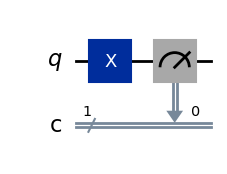

In [ ]:
qc = QuantumCircuit(1, 1)
qc.x(0)
qc.measure(0, 0)

qc.draw(output='mpl')


We are using the aer_simulator quantum computer
{'1': 1024}


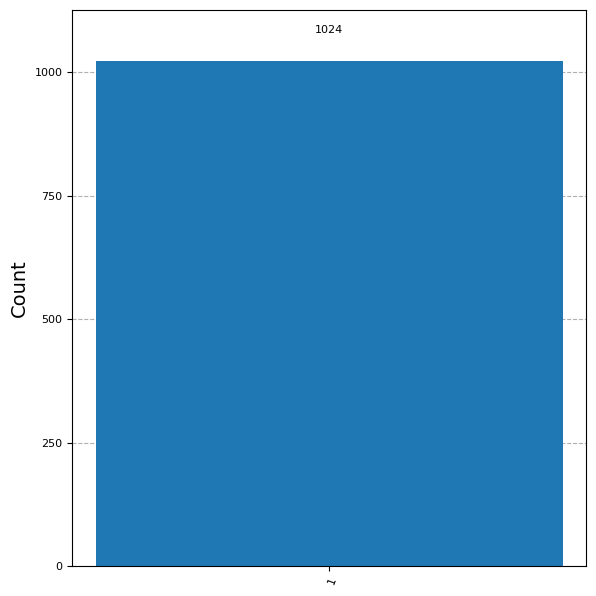

In [ ]:
transpiled_qc= transpile(qc)
# service = QiskitRuntimeService(name="qiskit_adi") - You can replace this with your own IBM Quantum account

# Get a backend

backend = AerSimulator()
#backend = service.least_busy(operational=True, simulator=False)
#backend= service.backend(name='ibm_torino')
print(f"We are using the {backend.name} quantum computer")

sampler = Sampler(mode=backend)
# Submit the circuit to Sampler
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
job_new = sampler.run(pm.run([transpiled_qc]),shots=1024)


# Get the results
results_new = job_new.result()[0].data
counts= results_new.c.get_counts()
print(counts)

plot_histogram(counts)


QUANTUM GATE: Pauli-X (NOT)

Circuit Diagram:
     ┌───┐┌─┐
  q: ┤ X ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


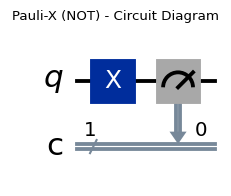


🔹 INITIAL STATE:


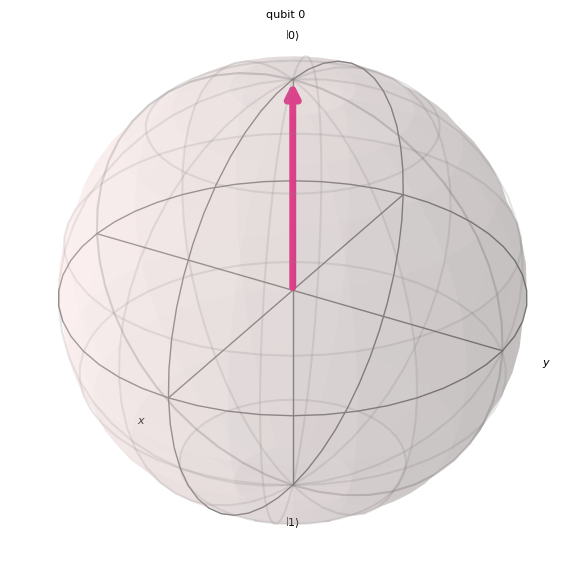


🔹 AFTER PAULI-X (NOT):


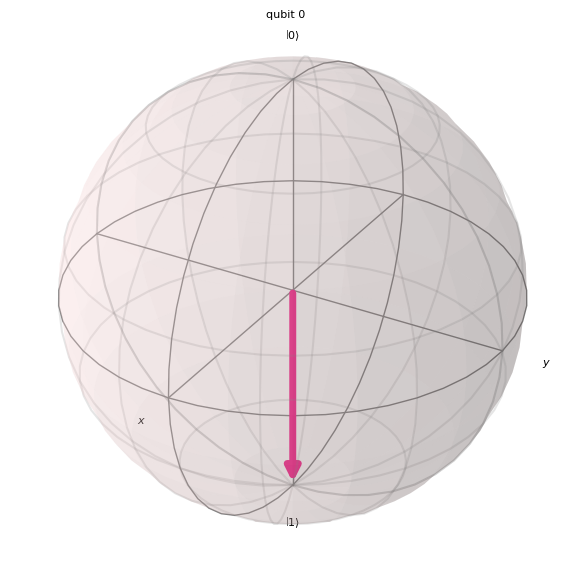


Measurement Results (100 shots):
  |1⟩: 100 times (1.000)


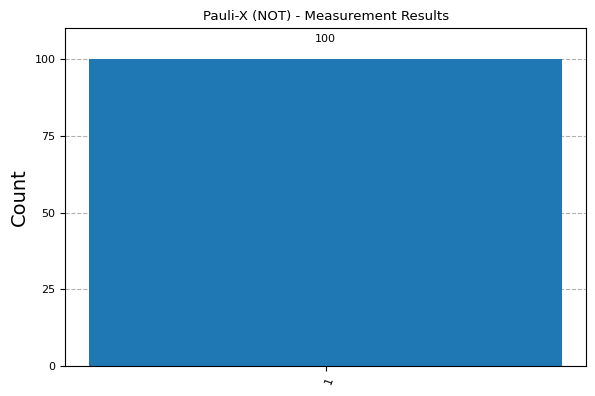

In [ ]:
# SINGLE-QUBIT GATES

# 1. Pauli-X Gate (NOT Gate)
def pauli_x_circuit():
    qc = QuantumCircuit(1, 1)
    qc.x(0)
    qc.measure(0, 0)
    return qc

qc = create_and_visualize_gate("Pauli-X (NOT)", pauli_x_circuit, run=True)

## Pauli-Y Gate

The Pauli-Y gate combines a bit flip with a phase flip:
- |0⟩ → i|1⟩  
- |1⟩ → -i|0⟩

**Matrix Representation:**
```
Y = [0  -i]
    [i   0]
```

**Bloch Sphere Effect:** Rotates the qubit by π radians around the Y-axis.

**Key Properties:**
- Introduces complex phases (i and -i)
- Anti-commutes with X and Z gates
- Used in quantum error correction codes


QUANTUM GATE: Pauli-Y

Circuit Diagram:
     ┌───┐┌───┐┌─┐
  q: ┤ H ├┤ Y ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 


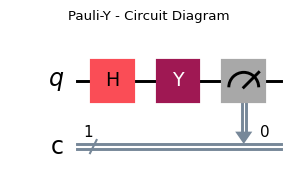


🔹 INITIAL STATE:


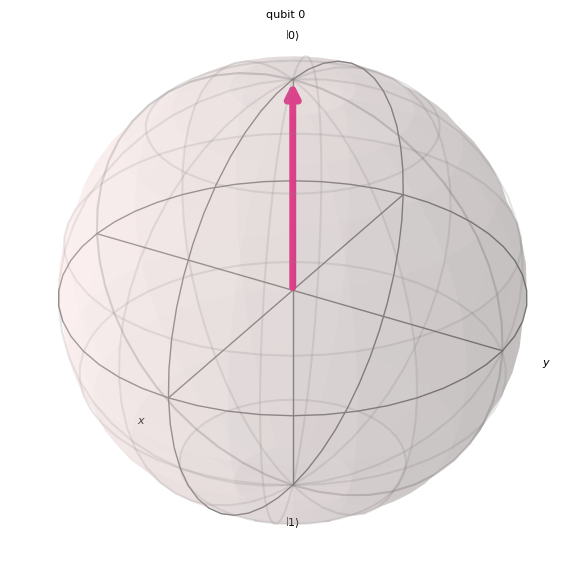


🔹 AFTER PAULI-Y:


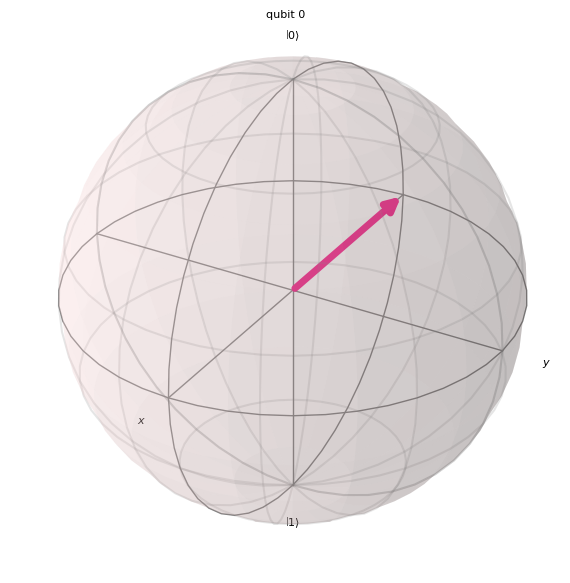


Measurement Results (100 shots):
  |1⟩: 38 times (0.380)
  |0⟩: 62 times (0.620)


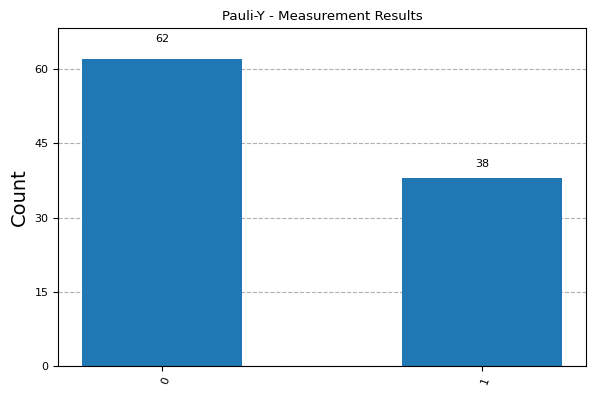

In [18]:
# 2. Pauli-Y Gate
def pauli_y_circuit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)
    qc.y(0)  # Apply Y gate
    qc.measure(0, 0)
    return qc

create_and_visualize_gate("Pauli-Y", pauli_y_circuit, run=True)

## Pauli-Z Gate

The Pauli-Z gate applies a phase flip without changing the computational basis:
- |0⟩ → |0⟩
- |1⟩ → -|1⟩

**Matrix Representation:**
```
Z = [1   0]
    [0  -1]
```

**Bloch Sphere Effect:** Rotates the qubit by π radians around the Z-axis.

**Important Notes:**
- Invisible in computational basis measurement
- Visible when measuring in superposition basis (X-basis)
- We use Hadamard gates before and after to observe the effect


QUANTUM GATE: Pauli-Z

Circuit Diagram:
     ┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ Z ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 


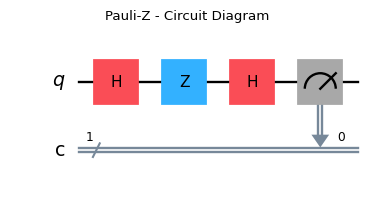


🔹 INITIAL STATE:


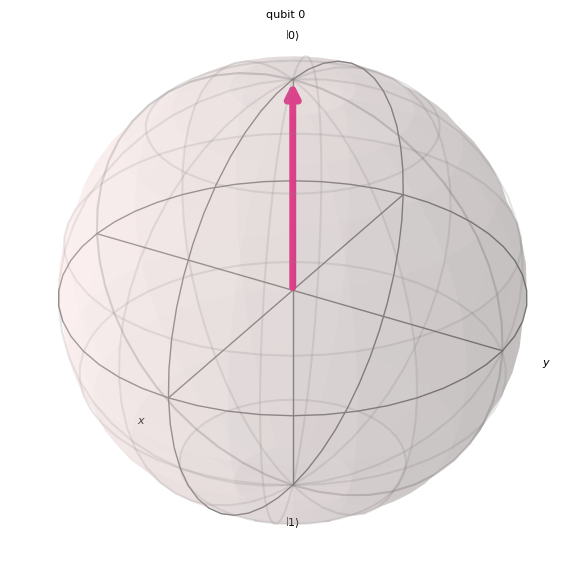


🔹 AFTER PAULI-Z:


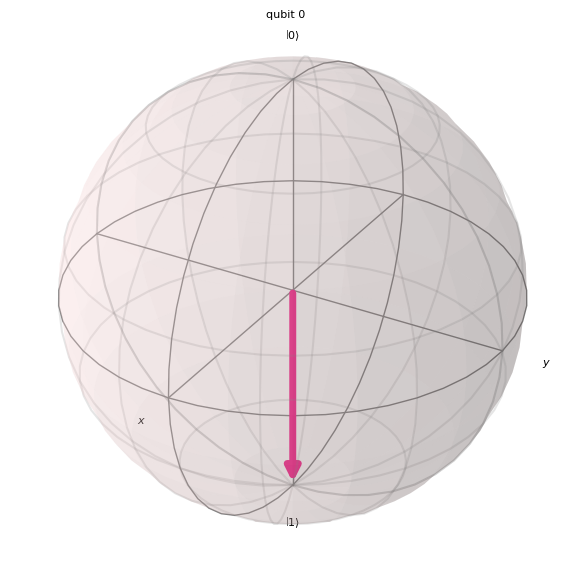

In [19]:
# 3. Pauli-Z Gate
def pauli_z_circuit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # Put in superposition first to see Z effect
    qc.z(0)  # Apply Z gate
    qc.h(0)  # Hadamard to measure in X-basis
    qc.measure(0, 0)
    return qc

create_and_visualize_gate("Pauli-Z", pauli_z_circuit)

# Clifford Gates

## Hadamard Gate

The Hadamard gate creates superposition - the most important concept in quantum computing.

**Matrix Representation:**
```
H = 1/√2 [1   1]
         [1  -1]
```

**State Transformations:**
- |0⟩ → (|0⟩ + |1⟩)/√2 = |+⟩
- |1⟩ → (|0⟩ - |1⟩)/√2 = |-⟩

**Bloch Sphere Effect:** Rotates by π around the axis (X+Z)/√2.

**Applications:**
- Creating superposition states
- Basis transformations (computational ↔ superposition)
- Quantum algorithms (Deutsch, Grover, Shor)
- Quantum interference


QUANTUM GATE: Hadamard

Circuit Diagram:
     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


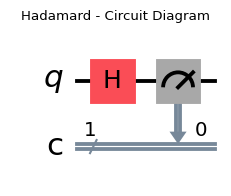


🔹 INITIAL STATE:


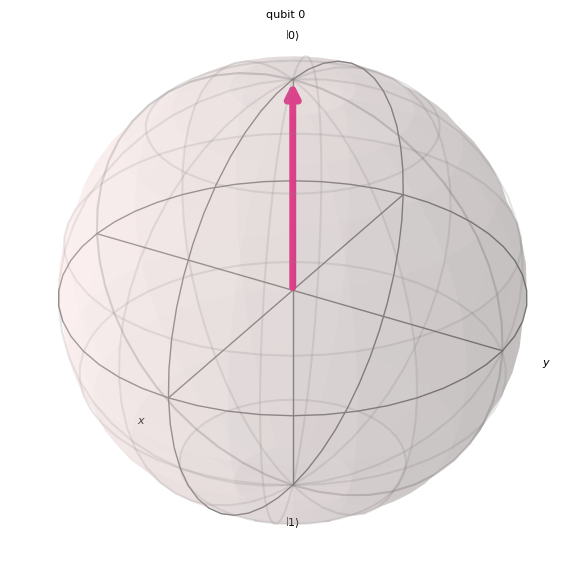


🔹 AFTER HADAMARD:


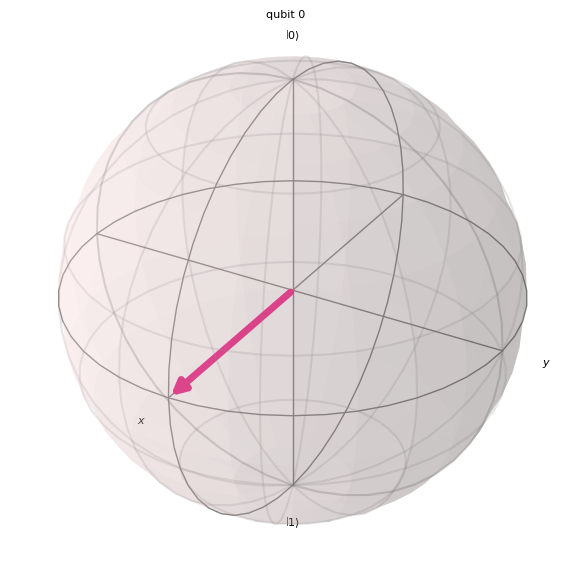


Measurement Results (100 shots):
  |0⟩: 44 times (0.440)
  |1⟩: 56 times (0.560)


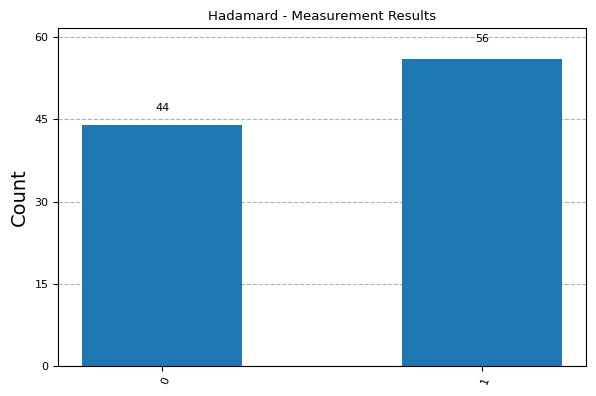

In [20]:
# 4. Hadamard Gate
def hadamard_circuit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # Apply Hadamard gate - creates superposition
    qc.measure(0, 0)
    return qc

create_and_visualize_gate("Hadamard", hadamard_circuit, run=True)

## S Gate (Phase Gate)

The S gate applies a π/2 phase rotation:
- |0⟩ → |0⟩
- |1⟩ → i|1⟩

**Matrix Representation:**
```
S = [1  0]
    [0  i]
```

**Bloch Sphere Effect:** π/2 rotation around Z-axis.

**Properties:**
- S² = Z (applying S twice gives Z gate)
- S† = S³ (S-dagger is the inverse)
- Member of the Clifford group


QUANTUM GATE: S Gate (Phase)

Circuit Diagram:
     ┌───┐┌───┐┌─┐
  q: ┤ H ├┤ S ├┤M├
     └───┘└───┘└╥┘
c: 1/═══════════╩═
                0 


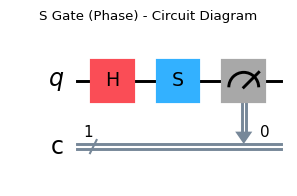


🔹 INITIAL STATE:


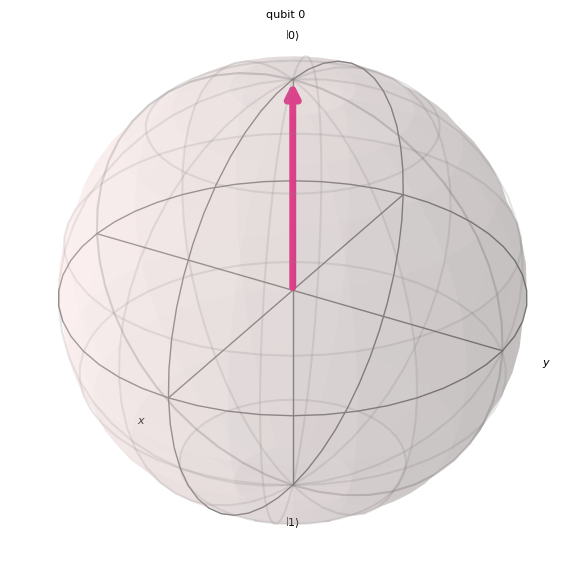


🔹 AFTER S GATE (PHASE):


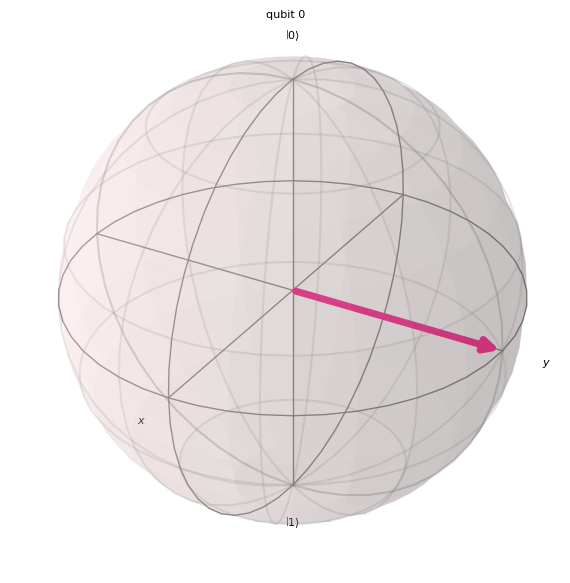


Measurement Results (100 shots):
  |1⟩: 53 times (0.530)
  |0⟩: 47 times (0.470)


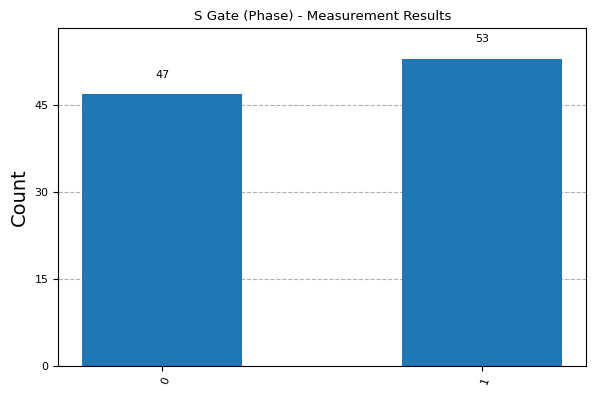

In [21]:
# 5. S Gate (Phase Gate)
def s_gate_circuit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # Put in superposition
    qc.s(0)  # Apply S gate (π/2 phase)
    # qc.h(0)  # Back to computational basis
    qc.measure(0, 0)
    return qc

create_and_visualize_gate("S Gate (Phase)", s_gate_circuit, run=True)

## T Gate

The T gate applies a π/4 phase rotation:
- |0⟩ → |0⟩  
- |1⟩ → e^(iπ/4)|1⟩

**Matrix Representation:**
```
T = [1    0   ]
    [0  e^(iπ/4)]
```

**Bloch Sphere Effect:** π/4 rotation around Z-axis.

**Properties:**
- T² = S (applying T twice gives S gate)
- T⁴ = I (applying T four times gives identity)
- NOT in Clifford group - enables universal quantum computation
- Essential for quantum advantage


QUANTUM GATE: T Gate

Circuit Diagram:
     ┌───┐┌───┐┌───┐┌─┐
  q: ┤ H ├┤ T ├┤ H ├┤M├
     └───┘└───┘└───┘└╥┘
c: 1/════════════════╩═
                     0 


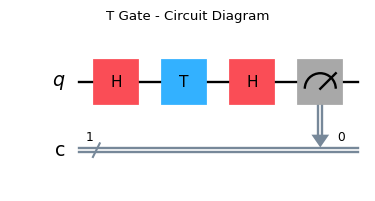


🔹 INITIAL STATE:


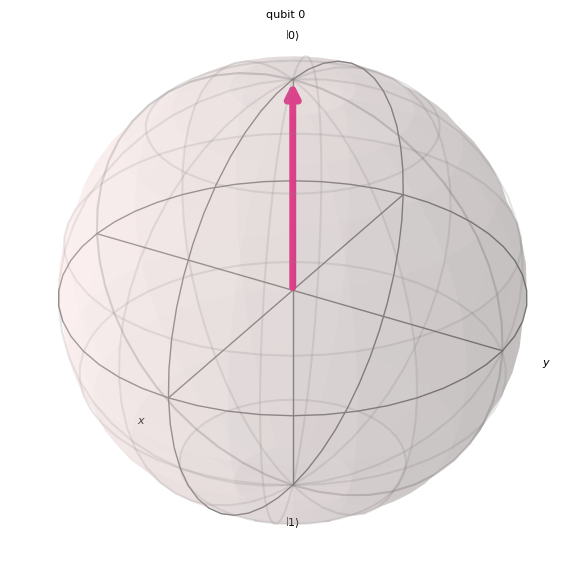


🔹 AFTER T GATE:


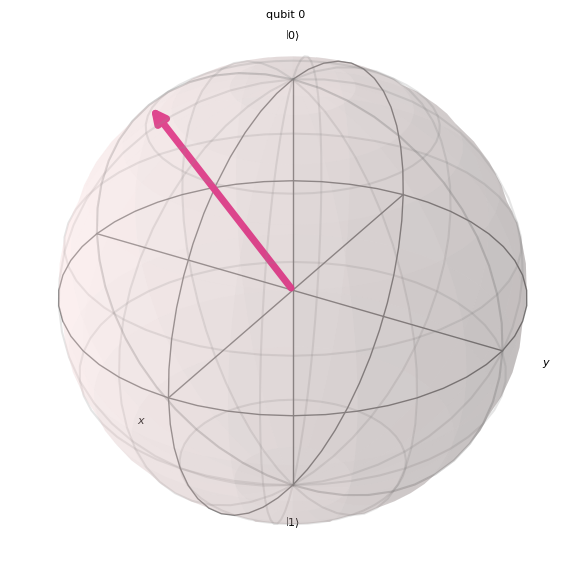

In [22]:
# 6. T Gate
def t_gate_circuit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # Put in superposition
    qc.t(0)  # Apply T gate (π/4 phase)
    qc.h(0)  # Back to computational basis
    qc.measure(0, 0)
    return qc

create_and_visualize_gate("T Gate", t_gate_circuit)

# Rotation Gates

Rotation gates provide continuous control over qubit states, parameterized by angle θ.

## RX Gate (X-Rotation)

Rotates qubit by angle θ around X-axis:

**Matrix Representation:**
```
RX(θ) = [cos(θ/2)   -i sin(θ/2)]
        [-i sin(θ/2)  cos(θ/2) ]
```

**Special Cases:**
- RX(π) = X (Pauli-X gate)
- RX(π/2) = X^(1/2) (square root of X)


QUANTUM GATE: RX(π/4) Rotation

Circuit Diagram:
     ┌─────────┐┌─┐
  q: ┤ Rx(π/4) ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0 


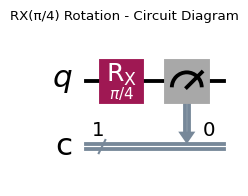


🔹 INITIAL STATE:


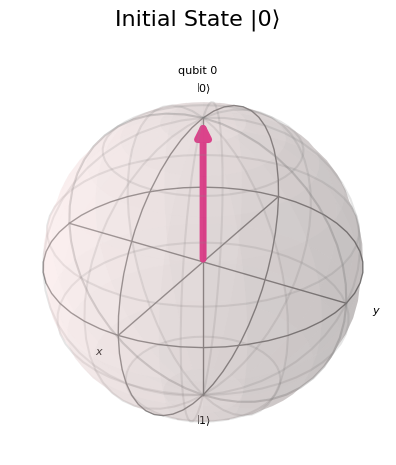


🔹 AFTER RX(Π/4) ROTATION:


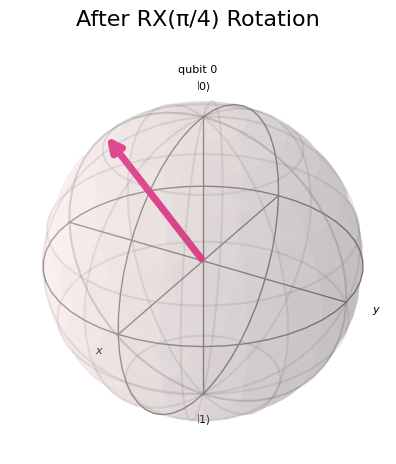

In [ ]:
# 7. Rotation Gates - RX
def rx_gate_circuit():
    qc = QuantumCircuit(1, 1)
    qc.rx(np.pi/4, 0)  # Rotate π/4 around X-axis
    qc.measure(0, 0)
    return qc

create_and_visualize_gate("RX(π/4) Rotation", rx_gate_circuit)

## RY Gate (Y-Rotation)

Rotates qubit by angle θ around Y-axis:

**Matrix Representation:**
```
RY(θ) = [cos(θ/2)  -sin(θ/2)]
        [sin(θ/2)   cos(θ/2)]
```

**Special Cases:**
- RY(π) = Y (Pauli-Y gate)
- RY(π/2) creates equal superposition without complex phases
- Most intuitive rotation gate for probability control


QUANTUM GATE: RY(π/3) Rotation

Circuit Diagram:
     ┌─────────┐┌─┐
  q: ┤ Ry(π/3) ├┤M├
     └─────────┘└╥┘
c: 1/════════════╩═
                 0 


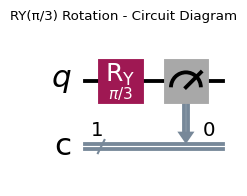


🔹 INITIAL STATE:


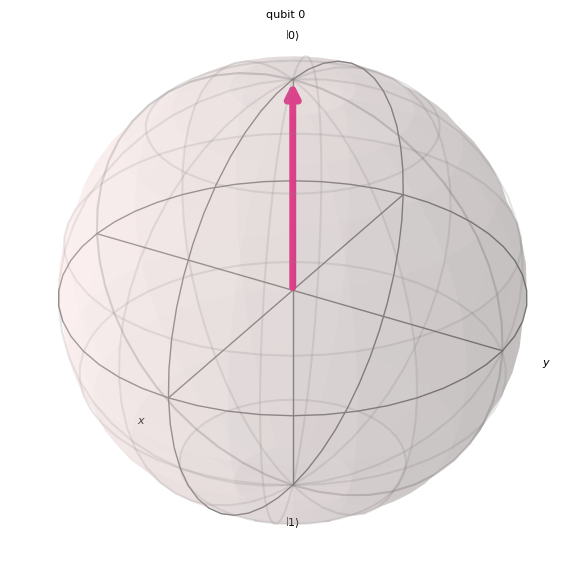


🔹 AFTER RY(Π/3) ROTATION:


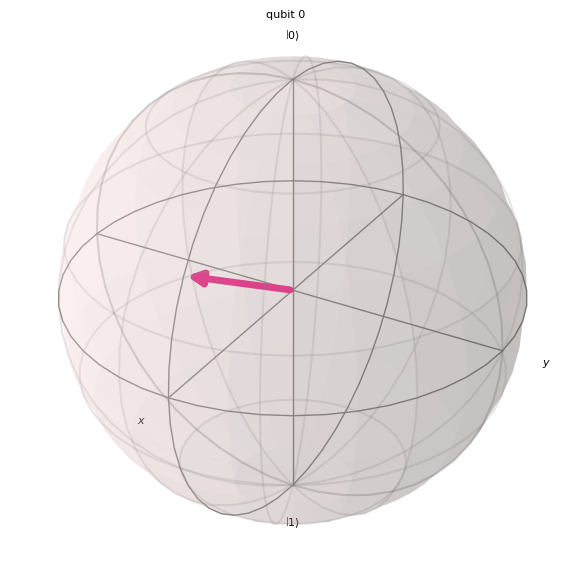

In [23]:
# 8. Rotation Gates - RY
def ry_gate_circuit():
    qc = QuantumCircuit(1, 1)
    qc.ry(np.pi/3, 0)  # Rotate π/3 around Y-axis
    qc.measure(0, 0)
    return qc

create_and_visualize_gate("RY(π/3) Rotation", ry_gate_circuit)

## RZ Gate (Z-Rotation)

Rotates qubit by angle θ around Z-axis:

**Matrix Representation:**
```
RZ(θ) = [e^(-iθ/2)    0     ]
        [   0      e^(iθ/2) ]
```

**Special Cases:**
- RZ(π) = Z (Pauli-Z gate)  
- RZ(π/2) = S (Phase gate)
- RZ(π/4) = T (T gate)


QUANTUM GATE: RZ(π/2) Rotation

Circuit Diagram:
     ┌───┐┌─────────┐┌───┐┌─┐
  q: ┤ H ├┤ Rz(π/2) ├┤ H ├┤M├
     └───┘└─────────┘└───┘└╥┘
c: 1/══════════════════════╩═
                           0 


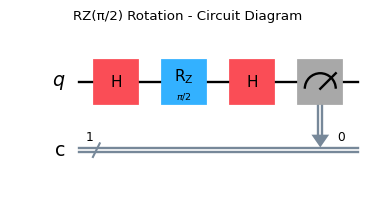


🔹 INITIAL STATE:


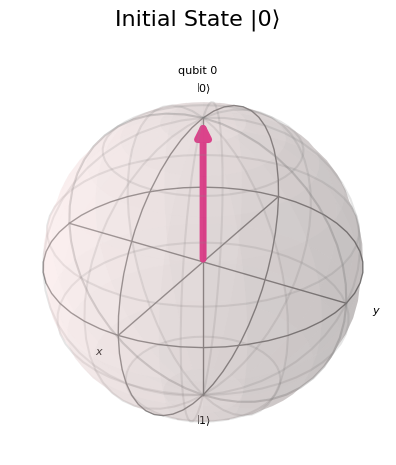


🔹 AFTER RZ(Π/2) ROTATION:


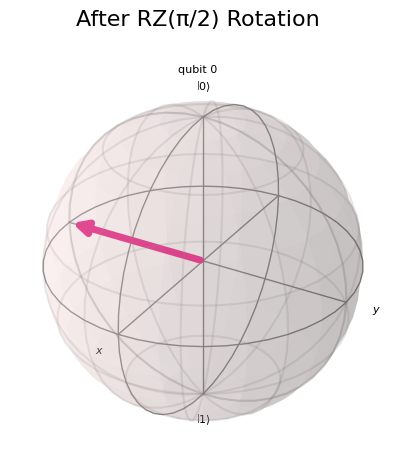

In [ ]:
# 9. Rotation Gates - RZ
def rz_gate_circuit():
    qc = QuantumCircuit(1, 1)
    qc.h(0)  # Put in superposition to see RZ effect
    qc.rz(np.pi/2, 0)  # Rotate π/2 around Z-axis
    qc.h(0)  # Back to computational basis
    qc.measure(0, 0)
    return qc

create_and_visualize_gate("RZ(π/2) Rotation", rz_gate_circuit)

# Two-Qubit Gates

Two-qubit gates create entanglement and correlations between qubits.

## CNOT Gate (Controlled-X)

The CNOT gate is the most important two-qubit gate. It flips the target qubit if the control qubit is |1⟩.

**Truth Table:**
```
|00⟩ → |00⟩
|01⟩ → |01⟩  
|10⟩ → |11⟩
|11⟩ → |10⟩
```

**Properties:**
- Creates entanglement when control is in superposition
- Reversible (its own inverse)
- Universal for classical computation
- Essential for quantum error correction

**Circuit Symbol:** Control qubit has a filled circle (●), target has ⊕

{'00': 518, '11': 482}


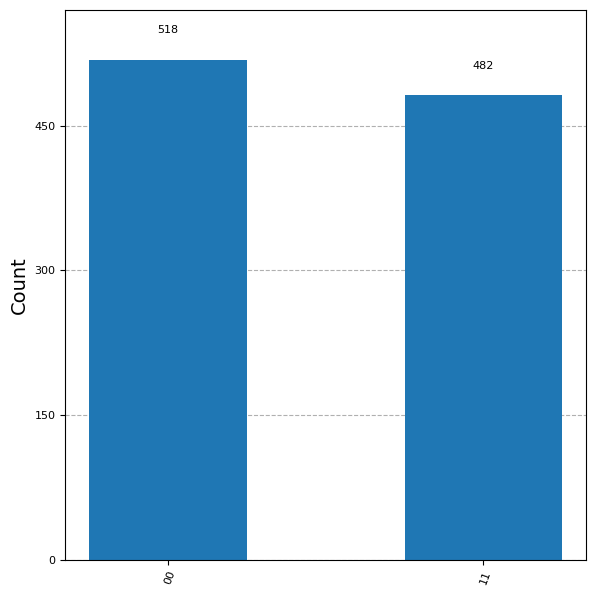

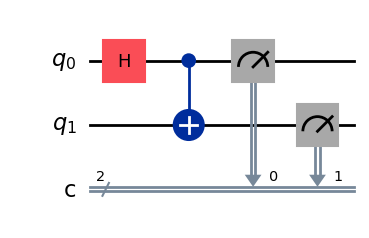

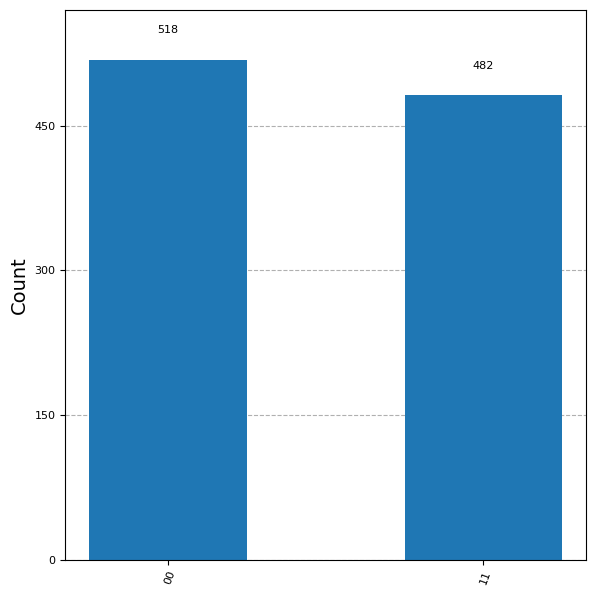

In [ ]:
# TWO-QUBIT GATES

# 10. CNOT Gate (Controlled-X)
def cnot_circuit():
    qc = QuantumCircuit(2, 2)
    qc.h(0)  # Put control qubit in superposition
    qc.cx(0, 1)  # CNOT gate
    qc.measure([0, 1], [0, 1])
    return qc

qc = cnot_circuit()
qc.draw(output='mpl')

backend= AerSimulator()
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_pm = pm.run(qc)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_pm], shots = 1000).result()[0].data.c.get_counts()

print(counts)
plot_histogram(counts)


## Controlled-Z Gate

The CZ gate applies a Z gate to the target if control is |1⟩:
- |11⟩ → -|11⟩ (only this state gets a phase flip)

**Properties:**
- Symmetric: CZ(control, target) = CZ(target, control)
- Creates entanglement with phase relationships
- Equivalent to CNOT up to single-qubit rotations

{'00': 514, '01': 486}


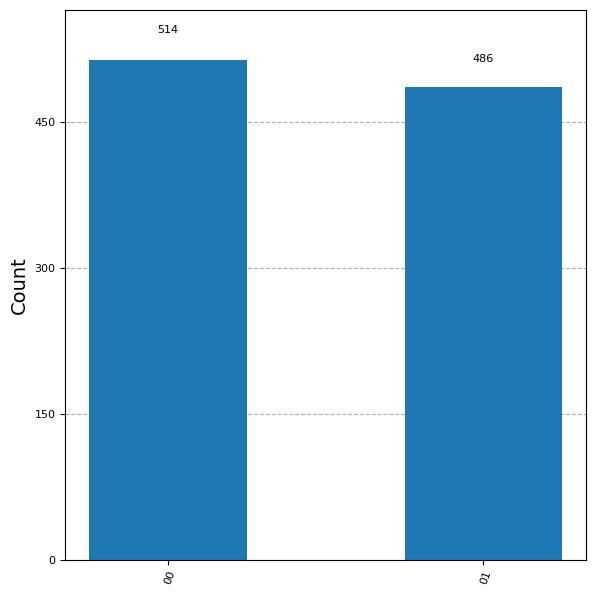

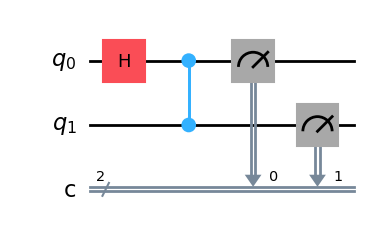

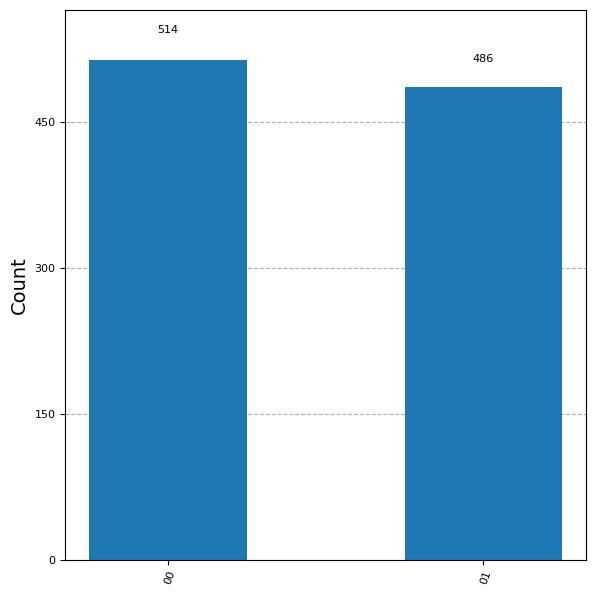

In [ ]:
def cz_circuit():
    qc = QuantumCircuit(2, 2)
    qc.h(0)  # Put control qubit in superposition
    qc.cz(0, 1)  # CZ gate
    qc.measure([0, 1], [0, 1])
    return qc

qc = cz_circuit()
qc.draw(output='mpl')

backend= AerSimulator()
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_pm = pm.run(qc)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_pm], shots = 1000).result()[0].data.c.get_counts()

print(counts)
plot_histogram(counts)

# Three-Qubit Gates

## Toffoli Gate (CCX)

The Toffoli gate is a controlled-controlled-X gate. It flips the target qubit only if both control qubits are |1⟩.

**Properties:**
- Universal for classical computation (can implement any Boolean function)
- Reversible classical gate
- Essential for quantum algorithms
- Used in quantum arithmetic circuits

**Truth Table:**
Only |110⟩ → |111⟩ and |111⟩ → |110⟩, all other states unchanged.

{'110': 123, '100': 140, '001': 129, '011': 133, '101': 108, '111': 132, '000': 108, '010': 127}


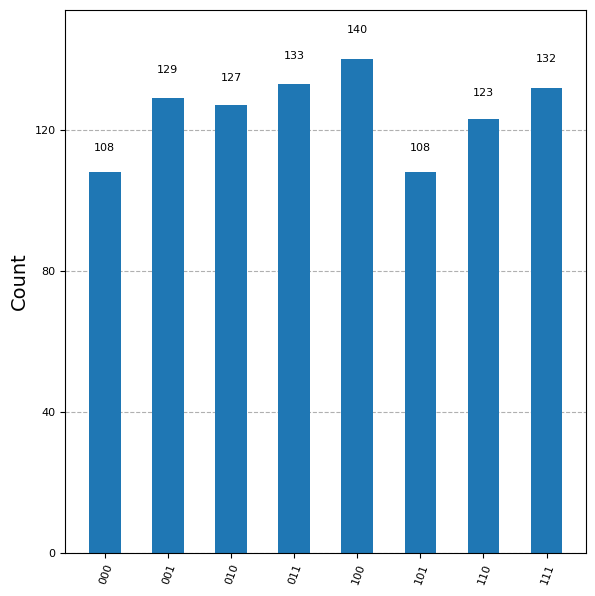

In [24]:
# THREE-QUBIT GATES

# 14. Toffoli Gate (CCX - Controlled-Controlled-X)
qc= QuantumCircuit(3,3)
qc.h(0)
qc.h(1)
qc.h(2)

qc.ccx(0,1,2)
qc.measure([0,1,2],[0,1,2])

qc.draw(output='mpl')

backend= AerSimulator()
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_pm = pm.run(qc)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_pm], shots = 1000).result()[0].data.c.get_counts()

print(counts)
plot_histogram(counts)

# Famous Quantum States and Circuits

## Bell States (EPR Pairs)

Bell states are maximally entangled two-qubit states:

1. **|Φ+⟩ = (|00⟩ + |11⟩)/√2** - Created by H⊗I followed by CNOT
2. **|Φ-⟩ = (|00⟩ - |11⟩)/√2**
3. **|Ψ+⟩ = (|01⟩ + |10⟩)/√2**
4. **|Ψ-⟩ = (|01⟩ - |10⟩)/√2**

**Properties:**
- Measuring one qubit instantly determines the other
- Foundation of quantum communication protocols
- Violate Bell inequalities (prove quantum mechanics is non-local)

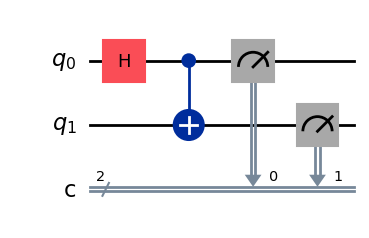

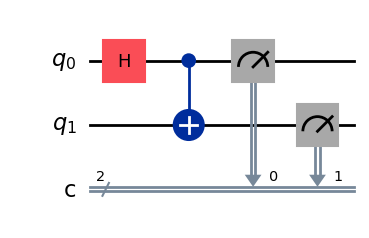

In [ ]:
# FAMOUS QUANTUM CIRCUITS
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw(output='mpl')


{'111': 126, '000': 113, '011': 117, '001': 130, '100': 137, '010': 133, '110': 126, '101': 118}


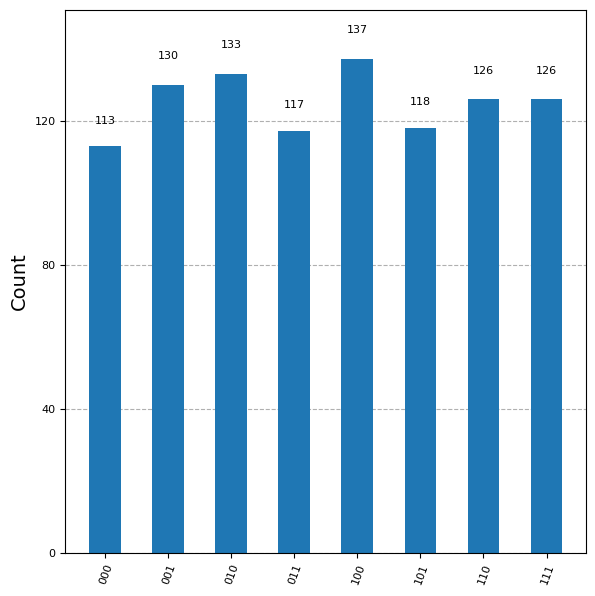

In [25]:

backend= AerSimulator()
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_pm = pm.run(qc)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_pm], shots = 1000).result()[0].data.c.get_counts()

print(counts)
plot_histogram(counts)

## GHZ State

The GHZ state extends Bell entanglement to three qubits:
**|GHZ⟩ = (|000⟩ + |111⟩)/√2**

**Properties:**
- All qubits are maximally entangled
- Measuring any qubit determines all others
- More fragile than Bell states
- Used in quantum error correction
- Demonstrates genuine three-party quantum correlations

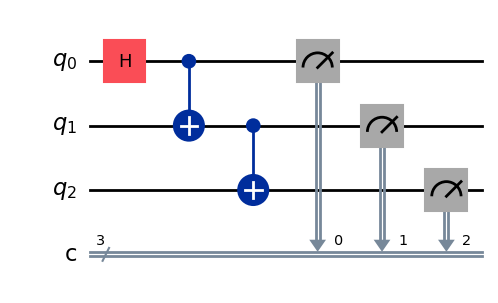

In [26]:
# 17. GHZ State (3-qubit entangled state)
qc= QuantumCircuit(3,3)
qc.h(0)
# qc.h(1)
# qc.h(2)
# qc.ccx(0, 1, 2)

qc.cx(0,1)
qc.cx(1,2)
qc.measure([0,1,2],[0,1,2])

qc.draw(output='mpl')

{'000': 501, '111': 499}


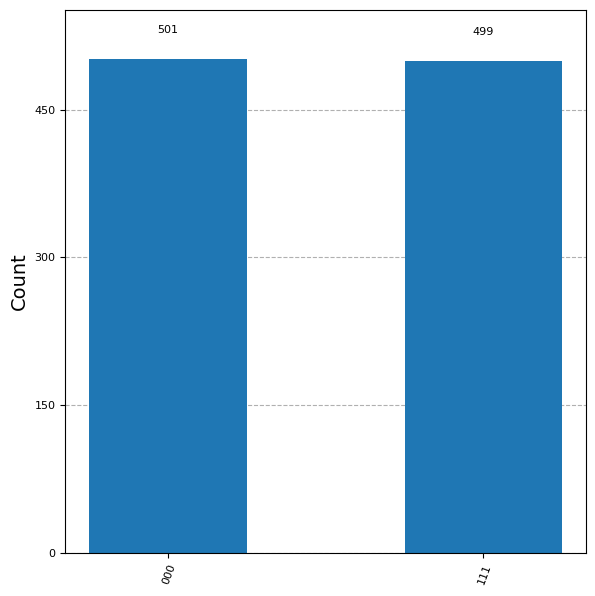

In [27]:
backend= AerSimulator()
pm = generate_preset_pass_manager(backend = backend, optimization_level=3)
qc_pm = pm.run(qc)

# run and get counts
sampler = Sampler(mode=backend)
counts = sampler.run([qc_pm], shots = 1000).result()[0].data.c.get_counts()

print(counts)
plot_histogram(counts)